In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

We are going to clean the MoodyLyricsQ4 data and merge it with the hugging face dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
DATA_DIR = '/content/drive/MyDrive/APS360 Group/Data/'
moody_df = pd.read_csv(DATA_DIR + 'MoodyLyricsQ4_with_lyrics.csv').drop(columns='Unnamed: 0')
moody_df.head()

,index,artist,title,mood,lyrics
0,ML1,George Michael,I Want Your Sex,happy,[Verse 1]\nThere's things that you guess\nAnd ...
1,ML2,Rob Zombie,Pussy Liquor,angry,[Intro: Baby Firefly & Cheerleader]\nGimme a B...
2,ML3,Katatonia,12,sad,[Chorus]\nBlack theatre of love\nViolet dancer...
3,ML4,Bing Crosby,Swinging On A Star,happy,13 ContributorsSwinging On a Star Lyrics[Choru...
4,ML5,Ludacris,Get Back,angry,"[Intro]\nHeads up! (woop, woop) Heads up! (woo..."


Most of these are prefaced with ...{title} lyrics

In [4]:
moody_df['lyrics'] = moody_df['lyrics'].str.replace(".*[lL]yrics", '', n=1, regex=True)
moody_df.head()

,index,artist,title,mood,lyrics
0,ML1,George Michael,I Want Your Sex,happy,[Verse 1]\nThere's things that you guess\nAnd ...
1,ML2,Rob Zombie,Pussy Liquor,angry,[Intro: Baby Firefly & Cheerleader]\nGimme a B...
2,ML3,Katatonia,12,sad,[Chorus]\nBlack theatre of love\nViolet dancer...
3,ML4,Bing Crosby,Swinging On A Star,happy,[Chorus: Bing Crosby & Chorus]\nWould you like...
4,ML5,Ludacris,Get Back,angry,"[Intro]\nHeads up! (woop, woop) Heads up! (woo..."


In [5]:
moody_df['lyrics'] = moody_df['lyrics'].str.replace('\n', ' ')
moody_df.head()

,index,artist,title,mood,lyrics
0,ML1,George Michael,I Want Your Sex,happy,[Verse 1] There's things that you guess And a'...
1,ML2,Rob Zombie,Pussy Liquor,angry,[Intro: Baby Firefly & Cheerleader] Gimme a B ...
2,ML3,Katatonia,12,sad,[Chorus] Black theatre of love Violet dancers ...
3,ML4,Bing Crosby,Swinging On A Star,happy,[Chorus: Bing Crosby & Chorus] Would you like ...
4,ML5,Ludacris,Get Back,angry,"[Intro] Heads up! (woop, woop) Heads up! (woop..."


In [6]:
moody_df['lyrics'].str.match('.*\[[^\]]*\].*|.*\{[^\]]*\}.*').sum()

1220

In [7]:
moody_df['lyrics'] = moody_df['lyrics'].str.replace('\[[^\]]*\]|\{[^\]]*\}', ' ', regex=True)
moody_df['lyrics'].str.match('.*\[[^\]]*\].*|.*\{[^\]]*\}.*').sum()

0

In [8]:
moody_df.head()

,index,artist,title,mood,lyrics
0,ML1,George Michael,I Want Your Sex,happy,There's things that you guess And a'things a...
1,ML2,Rob Zombie,Pussy Liquor,angry,Gimme a B Gimme a A Gimme a B Gimme a Y What...
2,ML3,Katatonia,12,sad,Black theatre of love Violet dancers cast th...
3,ML4,Bing Crosby,Swinging On A Star,happy,Would you like to swing on a star Carry moon...
4,ML5,Ludacris,Get Back,angry,"Heads up! (woop, woop) Heads up! (woop, woop..."


In [9]:
moody_df['lang'] = pd.read_csv(DATA_DIR+'langs.csv')['0']

<Axes: xlabel='lang', ylabel='Count'>

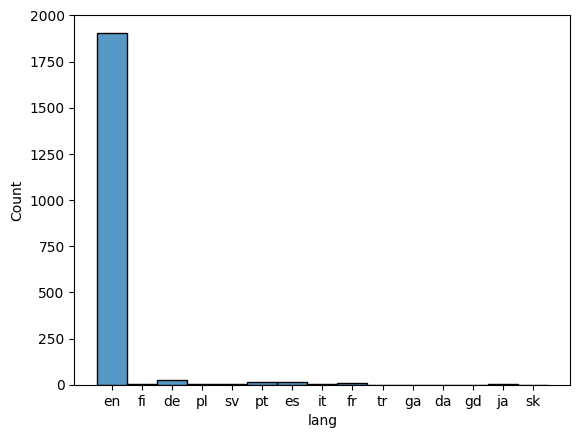

In [10]:
sns.histplot(moody_df, x='lang')

In [11]:
def isEnglish(s):
  return s.isascii()
moody_df = moody_df[(moody_df['lang'] == 'en') & moody_df['lyrics'].apply(isEnglish)]
moody_df.head()

,index,artist,title,mood,lyrics,lang
1,ML2,Rob Zombie,Pussy Liquor,angry,Gimme a B Gimme a A Gimme a B Gimme a Y What...,en
2,ML3,Katatonia,12,sad,Black theatre of love Violet dancers cast th...,en
3,ML4,Bing Crosby,Swinging On A Star,happy,Would you like to swing on a star Carry moon...,en
4,ML5,Ludacris,Get Back,angry,"Heads up! (woop, woop) Heads up! (woop, woop...",en
5,ML6,Hole,Violet,angry,And the sky was made of amethyst And all the...,en


In [12]:
moody_df.shape

(1709, 6)

<Axes: xlabel='mood', ylabel='Count'>

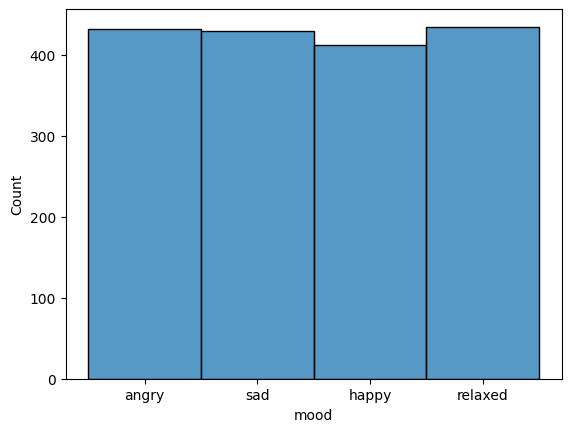

In [13]:
sns.histplot(moody_df, x='mood')

In [14]:
moody_df.reset_index(inplace=True)
moody_df

,level_0,index,artist,title,mood,lyrics,lang
0,1,ML2,Rob Zombie,Pussy Liquor,angry,Gimme a B Gimme a A Gimme a B Gimme a Y What...,en
1,2,ML3,Katatonia,12,sad,Black theatre of love Violet dancers cast th...,en
2,3,ML4,Bing Crosby,Swinging On A Star,happy,Would you like to swing on a star Carry moon...,en
3,4,ML5,Ludacris,Get Back,angry,"Heads up! (woop, woop) Heads up! (woop, woop...",en
4,5,ML6,Hole,Violet,angry,And the sky was made of amethyst And all the...,en
...,...,...,...,...,...,...,...
1704,1994,ML1995,W.A.S.P.,I Don't Need No Doctor,angry,I don't need no doctor 'Cause I know what's ai...,en
1705,1995,ML1996,A Day To Remember,If It Means a Lot to You,sad,"And hey, darling I hope you're good tonight ...",en
1706,1997,ML1998,Deine Lakaien,The Game,sad,Grey eyes flicker Cold is the weed Worn out sh...,en
1707,1998,ML1999,Fatboy Slim,Talking Bout My Baby,happy,Yeah yeah yeah yeah yeah Woah yeah talkin' 'bo...,en


In [15]:
moody_df.drop(columns=['level_0', 'lang'],inplace=True)
moody_df

,index,artist,title,mood,lyrics
0,ML2,Rob Zombie,Pussy Liquor,angry,Gimme a B Gimme a A Gimme a B Gimme a Y What...
1,ML3,Katatonia,12,sad,Black theatre of love Violet dancers cast th...
2,ML4,Bing Crosby,Swinging On A Star,happy,Would you like to swing on a star Carry moon...
3,ML5,Ludacris,Get Back,angry,"Heads up! (woop, woop) Heads up! (woop, woop..."
4,ML6,Hole,Violet,angry,And the sky was made of amethyst And all the...
...,...,...,...,...,...
1704,ML1995,W.A.S.P.,I Don't Need No Doctor,angry,I don't need no doctor 'Cause I know what's ai...
1705,ML1996,A Day To Remember,If It Means a Lot to You,sad,"And hey, darling I hope you're good tonight ..."
1706,ML1998,Deine Lakaien,The Game,sad,Grey eyes flicker Cold is the weed Worn out sh...
1707,ML1999,Fatboy Slim,Talking Bout My Baby,happy,Yeah yeah yeah yeah yeah Woah yeah talkin' 'bo...


In [16]:
#remove any parantheses ()
moody_df['lyrics'] = moody_df['lyrics'].str.replace('[\(\)]', ' ', regex=True)

In [17]:
moody_df['lyrics'].str.contains('x[1-9]{1,}').sum()

14

In [18]:
moody_df['lyrics'] = moody_df['lyrics'].str.replace('x[1-9]{1,}', ' ')
moody_df['lyrics'].str.contains('x[1-9]{1,}').sum()

<ipython-input-18-e44b05b04398>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  moody_df['lyrics'] = moody_df['lyrics'].str.replace('x[1-9]{1,}', ' ')


0

In [19]:
moody_df['lyrics'] = moody_df['lyrics'].str.replace("You might also like", ' ')

In [20]:
moody_df['lyrics'] = moody_df['lyrics'].str.replace('See.*LiveGet tickets as low as \$[1-9]*', ' ', regex=True)

In [21]:
moody_df['lyrics'] = moody_df['lyrics'].str.replace('[1-9]*[eE]mbed', ' ', regex=True)

In [22]:
moody_df['lyrics'].str.contains('[1-9]').sum()

178

In [23]:
moody_df[moody_df['lyrics'].str.contains('[1-9]')]

,index,artist,title,mood,lyrics
1,ML3,Katatonia,12,sad,Black theatre of love Violet dancers cast th...
5,ML7,Manic Street Preachers,Ifwhiteamericatoldthetruthforonedayit'sworldwo...,angry,Next Thursday you're invited to watch Rising...
6,ML9,Megadeth,Architecture of Aggression,angry,Born from the dark in the black cloak of nig...
12,ML16,50 Cent,My Gun Go Off,angry,"Nigga, my gun go off - you see the barrel..."
24,ML30,Iron Maiden,Aces High,angry,There goes the siren that warns of the ai...
...,...,...,...,...,...
1674,ML1960,Triumph the Insult Comic Dog,I Keed (Album Version),happy,I thought my CD was done But that's not what t...
1682,ML1968,Beatallica,Sgt. Hetfield's Motorbreath Pub Band,happy,It was 20 years ago today Motorhead taught thi...
1683,ML1969,Eminem,Lose Yourself,angry,"Look, if you had one shot or one opportunity..."
1697,ML1987,Turin Brakes,Future Boy,relaxed,So Future Boy where are you from? My time mach...


In [24]:
!pip install inflect

In [25]:
import inflect
p = inflect.engine()

In [26]:
import nltk

In [27]:
word_tokenizer = nltk.tokenize.WhitespaceTokenizer()
def convert_numbers(s):
  out = []
  for w in word_tokenizer.tokenize(s):
    num_word = p.number_to_words(w)
    if num_word == 'zero' and w != '0' or num_word =='zeroth' and w != '0th' or num_word == 'zero point zero' and w!='0.0':
      out.append(w)
      continue
    out.append(num_word)
  return ' '.join(out)

In [28]:
moody_df['lyrics'] = moody_df['lyrics'].apply(convert_numbers)

In [29]:
moody_df['lyrics'].str.contains('[1-9]').sum()

0

In [30]:
moody_df['lyrics'] = moody_df['lyrics'].str.replace("'", '')

In [31]:
import string
def remove_punctuation(lyric):
  out = []
  for c in lyric:
    if c in string.punctuation:
      out.append(' ')
      continue
    out.append(c)
  return ''.join(out)

In [32]:
moody_df['lyrics'] = moody_df['lyrics'].apply(remove_punctuation)

In [33]:
moody_df['lyrics'] = moody_df['lyrics'].str.replace("…", ' ')

In [34]:
moody_df['lyrics'] = moody_df['lyrics'].str.lower()

In [35]:
moody_df['lyrics'] = moody_df['lyrics'].str.replace('\s{2,}', ' ', regex=True).str.strip()

In [36]:
moody_df['word_count'] = moody_df['lyrics'].apply(lambda s: len(s.split()))

<Axes: xlabel='word_count', ylabel='Count'>

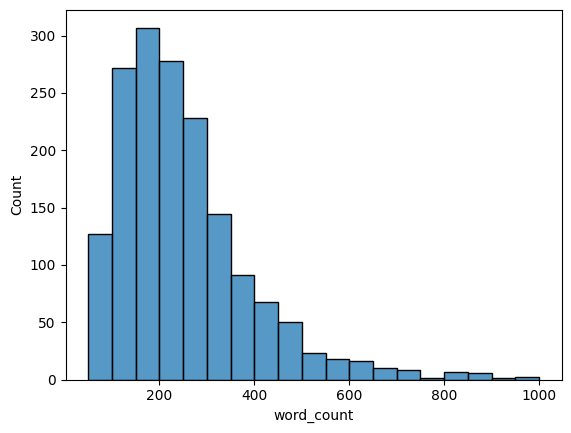

In [37]:
sns.histplot(moody_df, x='word_count', bins=[50*i for i in range(1, 21)])

In [38]:
lb, ub = moody_df['word_count'].quantile(0.05), moody_df['word_count'].quantile(0.95)

In [39]:
moody_df = moody_df[(moody_df['word_count'] > lb) & (moody_df['word_count'] < ub)].reset_index().drop(columns=['level_0', 'word_count'])

In [40]:
moody_df.drop(columns='index', inplace=True)

In [42]:
moody_df.drop(index=[1426,1009,929,839,825,487,435,342,226], inplace=True)
moody_df = moody_df.reset_index()

<Axes: xlabel='mood', ylabel='Count'>

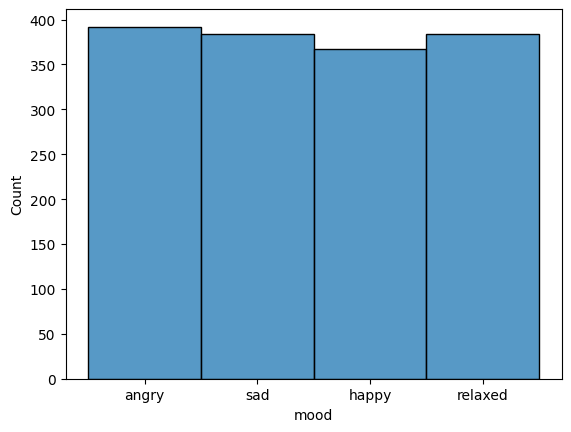

In [43]:
sns.histplot(moody_df, x='mood')

In [44]:
moody_df.to_csv(DATA_DIR+'moody_clean.csv')